In [246]:
import pandas as pd
import os
import csv
import glob
import matplotlib.pyplot as plt

In [247]:
mainpath = "C:/Users/marce/Python"
filename = "Analisis/Data.csv"
fullpath = os.path.join(mainpath,filename)

In [248]:
data = pd.read_csv(fullpath)
data.head()

,Tiempo,Extensión,Carga,Tiempo.1,Extensión.1,Carga.1,Tiempo.2,Extensión.2,Carga.2,Tiempo.3,Extensión.3,Carga.3,Tiempo.4,Extensión.4,Carga.4,Tiempo.5,Extensión.5,Carga.5
0,0.0,0.00000,-0.00288,0.1,0.00187,-0.00367,0.0,0.00000,-0.00477,0.0,0.00000,0.00062,0.0,0.00000,-0.00629,0.0,0.00000,-0.00128
1,0.1,0.00229,-0.00118,0.2,0.00896,0.00317,0.1,0.00271,-0.00450,0.1,0.00146,0.00133,0.1,0.00167,-0.00644,0.1,0.00250,-0.00141
2,0.2,0.00937,0.00647,0.3,0.01917,0.01499,0.2,0.00958,-0.00085,0.2,0.01062,0.00728,0.2,0.00833,-0.00210,0.2,0.01250,0.00668
3,0.3,0.01937,0.01917,0.4,0.02937,0.02670,0.3,0.01958,0.01137,0.3,0.02187,0.01859,0.3,0.01854,0.00853,0.3,0.02292,0.01729
4,0.4,0.02937,0.03354,0.5,0.03917,0.03905,0.4,0.02958,0.02150,0.4,0.03187,0.02704,0.4,0.02896,0.02098,0.4,0.03229,0.02927


In [249]:
data.describe()

,Tiempo,Extensión,Carga,Tiempo.1,Extensión.1,Carga.1,Tiempo.2,Extensión.2,Carga.2,Tiempo.3,Extensión.3,Carga.3,Tiempo.4,Extensión.4,Carga.4,Tiempo.5,Extensión.5,Carga.5
count,36165.000000,37908.000000,40625.000000,40625.000000,40625.000000,39724.000000,39724.000000,39724.000000,37908.000000,37908.000000,36623.000000,36860.000000,36860.000000,36860.000000,36623.000000,36623.000000,36165.000000,36165.000000
mean,1808.200000,314.050187,293.538098,1633.517948,296.189017,208.488185,1662.913589,301.748983,32.895440,1727.018115,194.312224,45.959559,1776.643636,193.366078,24.000424,1786.173048,150.683446,21.161447
std,1044.008058,749.071604,974.686064,1104.589566,726.637328,806.282123,1099.338498,733.882337,61.697093,1084.704439,397.218855,293.793625,1059.012478,396.114392,34.097270,1055.762520,87.000656,13.501177
min,0.000000,0.000000,-0.002880,0.100000,0.001870,-0.003670,0.000000,0.000000,-0.004770,0.000000,0.000000,0.000620,0.000000,0.000000,-0.006440,0.000000,0.000000,-0.001410
25%,904.100000,78.972645,9.720820,569.700000,62.000200,9.167022,637.175000,67.624155,8.921685,773.375000,76.296030,8.431640,851.975000,74.815038,8.287760,869.750000,75.341870,8.756880
50%,1808.200000,157.945820,21.314710,1585.300000,146.633320,19.926455,1630.250000,150.380715,19.381965,1721.050000,152.591860,17.959280,1773.450000,151.604350,19.205000,1785.300000,150.683320,19.652810
75%,2712.300000,236.918777,35.073800,2600.900000,231.266430,32.973515,2623.325000,233.136290,31.748970,2668.725000,228.887785,29.560480,2694.925000,228.393838,32.400995,2700.850000,226.025390,32.780810
max,3616.398000,3790.758000,4062.326000,3616.500000,3790.700000,3972.242000,3616.400000,3790.700000,315.891630,3616.400000,3662.184000,3685.892000,3616.400000,3662.200000,305.183720,3616.400000,301.366420,46.559040


In [250]:
data.dtypes

Tiempo         float64
Extensión      float64
Carga          float64
Tiempo.1       float64
Extensión.1    float64
Carga.1        float64
Tiempo.2       float64
Extensión.2    float64
Carga.2        float64
Tiempo.3       float64
Extensión.3    float64
Carga.3        float64
Tiempo.4       float64
Extensión.4    float64
Carga.4        float64
Tiempo.5       float64
Extensión.5    float64
Carga.5        float64
dtype: object

In [251]:
pd.isnull(data["Carga.1"]).values.ravel().sum()

901

In [252]:
pd.notnull(data["Extensión"]).values.ravel().sum()

37908

# Borrado de columnas de "Tiempo"

In [253]:
data3 =data
data3 =data3.drop(["Tiempo", "Tiempo.1", "Tiempo.2", "Tiempo.3","Tiempo.4","Tiempo.5"],axis=1)
data3.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [254]:
account_lenght = data3[["Extensión","Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.5"]]
account_lenght.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [255]:
data4 = data3[data3["Extensión"]<3610]
data4.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


# Plot y visualización

In [256]:
matplotlib inline 

In [257]:
#Scatter plot

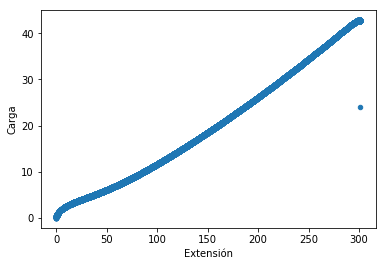

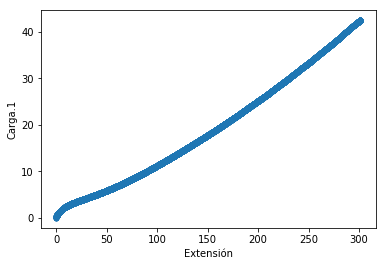

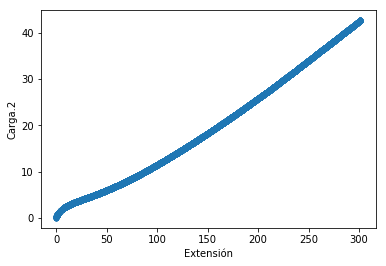

In [276]:
data4.plot(kind="scatter", x ="Extensión", y="Carga" )
data4.plot(kind="scatter", x ="Extensión", y="Carga.1")


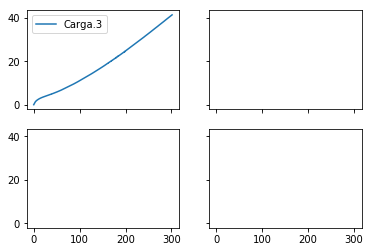

In [259]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data4.plot(kind="line", x ="Extensión.3", y="Carga.3", ax=axs[0][0])

In [260]:
Carga1= data3["Carga"]
Carga1.head()

0   -0.00288
1   -0.00118
2    0.00647
3    0.01917
4    0.03354
Name: Carga, dtype: float64

In [261]:
type(Carga1)

pandas.core.series.Series

In [262]:
subset = data[["Extensión", "Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.1", "Extensión.5", "Carga.5"]]

In [263]:
subset.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.1,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00367,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,0.00317,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.01499,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.02670,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.03905,0.03229,0.02927


In [264]:
data3[:10]

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927
5,0.03917,0.04614,0.04833,0.04964,0.03979,0.03266,0.04062,0.03371,0.03875,0.03309,0.04062,0.04099
6,0.04854,0.05757,0.05750,0.06030,0.04958,0.04323,0.04917,0.03992,0.04812,0.04286,0.04917,0.05017
7,0.05750,0.06945,0.06604,0.06899,0.05875,0.05418,0.05792,0.04607,0.05729,0.05261,0.05792,0.05718
8,0.06625,0.07874,0.07500,0.07736,0.06729,0.06084,0.06687,0.05236,0.06583,0.06236,0.06667,0.06586
9,0.07479,0.08982,0.08333,0.08542,0.07604,0.06981,0.07542,0.05816,0.07417,0.07000,0.07479,0.07259


In [265]:
subset1 = data3[["Extensión", "Carga", "Extensión.1", "Carga.1", "Extensión.2", "Carga.2", "Extensión.3", "Carga.3", "Extensión.4", "Carga.4", "Extensión.5", "Carga.1", "Extensión.5", "Carga.5"]][:50]
subset1.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.1,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00367,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,0.00317,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.01499,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.02670,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.03905,0.03229,0.02927


In [266]:
data3.iloc[1:10 , 3:6]
data3.head()

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5
0,0.00000,-0.00288,0.00187,-0.00367,0.00000,-0.00477,0.00000,0.00062,0.00000,-0.00629,0.00000,-0.00128
1,0.00229,-0.00118,0.00896,0.00317,0.00271,-0.00450,0.00146,0.00133,0.00167,-0.00644,0.00250,-0.00141
2,0.00937,0.00647,0.01917,0.01499,0.00958,-0.00085,0.01062,0.00728,0.00833,-0.00210,0.01250,0.00668
3,0.01937,0.01917,0.02937,0.02670,0.01958,0.01137,0.02187,0.01859,0.01854,0.00853,0.02292,0.01729
4,0.02937,0.03354,0.03917,0.03905,0.02958,0.02150,0.03187,0.02704,0.02896,0.02098,0.03229,0.02927


In [267]:
data3["Esfuerzo.1 (GPa)"] = data3["Carga"]
data3["Def.1 (mm/mm)"] = (data["Extensión"]/9.8)/70.1
data3["Esfuerzo.2 (GPa)"] = (data3["Carga.1"]/10)/30

In [268]:
data3["Esfuerzo.1 (GPa)"].head()
data3["Def.1 (mm/mm)"].head() 
data3["Esfuerzo.2 (GPa)"].head()

0   -0.000012
1    0.000011
2    0.000050
3    0.000089
4    0.000130
Name: Esfuerzo.2 (GPa), dtype: float64

In [269]:
data3.shape

(40625, 15)

In [270]:
data3.tail(4000)

,Extensión,Carga,Extensión.1,Carga.1,Extensión.2,Carga.2,Extensión.3,Carga.3,Extensión.4,Carga.4,Extensión.5,Carga.5,Esfuerzo.1 (GPa),Def.1 (mm/mm),Esfuerzo.2 (GPa)
36625,3662.6,305.21683,3662.50000,305.20975,3662.5,305.20871,NaN,3662.5,47.18074,NaN,NaN,NaN,305.21683,5.331451,1.017366
36626,3662.7,305.22495,3662.60000,305.21808,3662.6,305.21661,NaN,3662.6,47.18102,NaN,NaN,NaN,305.22495,5.331596,1.017394
36627,3662.8,305.23309,3662.70000,305.22601,3662.7,305.22537,NaN,3662.7,47.18350,NaN,NaN,NaN,305.23309,5.331742,1.017420
36628,3662.9,305.24161,3662.80000,305.23456,3662.8,305.23392,NaN,3662.8,47.18461,NaN,NaN,NaN,305.24161,5.331887,1.017449
36629,3663.0,305.25018,3662.90000,305.24329,3662.9,305.24203,NaN,3662.9,47.18661,NaN,NaN,NaN,305.25018,5.332033,1.017478
36630,3663.1,305.25848,3663.00000,305.25162,3663.0,305.24997,NaN,3663.0,47.18691,NaN,NaN,NaN,305.25848,5.332179,1.017505
36631,3663.2,305.26663,3663.10000,305.25952,3663.1,305.25848,NaN,3663.1,47.18830,NaN,NaN,NaN,305.26663,5.332324,1.017532
36632,3663.3,305.27475,3663.20000,305.26767,3663.2,305.26703,NaN,3663.2,47.19072,NaN,NaN,NaN,305.27475,5.332470,1.017559
36633,3663.4,305.28326,3663.30000,305.27600,3663.3,305.27579,NaN,3663.3,47.19133,NaN,NaN,NaN,305.28326,5.332615,1.017587
36634,3663.5,305.29184,3663.40000,305.28494,3663.4,305.28391,NaN,3663.4,47.19140,NaN,NaN,NaN,305.29184,5.332761,1.017616


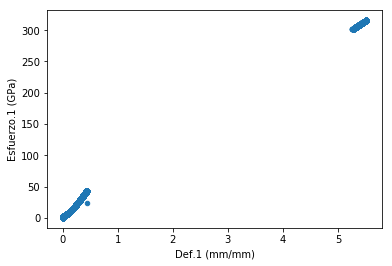

In [271]:
data3.plot(kind="scatter", x ="Def.1 (mm/mm)", y="Esfuerzo.1 (GPa)")